# Decision Tree DT _ iris_multi

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my
from sklearn.tree import DecisionTreeClassifier

### 데이터 준비

In [5]:
X_train, X_test, y_train, y_test = my.get_iris()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [7]:
# Decision Tree는 정규화가 굳이 필요없다!

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 2022)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

# GridSearchCV

In [10]:
from sklearn.model_selection import GridSearchCV

params = {
    'min_samples_leaf' : range(1, 10),
    'max_depth' : range(3, 10),
    'min_samples_split' : range(3, 10)
}

clf = DecisionTreeClassifier(random_state = 2022)

gs = GridSearchCV(
    clf, params, cv=3, verbose=3, n_jobs = -1

)

gs.fit(X_train, y_train)

Fitting 3 folds for each of 441 candidates, totalling 1323 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=2022),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(3, 10)},
             verbose=3)

In [11]:
gs.best_score_

0.9666666666666667

In [12]:
gs.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [18]:
clf = DecisionTreeClassifier(min_samples_leaf = 1, max_depth = 3, min_samples_split = 3, random_state = 2022)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=3, random_state=2022)

In [19]:
clf.score(X_train, y_train)

0.975

In [20]:
clf.score(X_test, y_test)

0.9666666666666667

### 학습된 모델 시각화

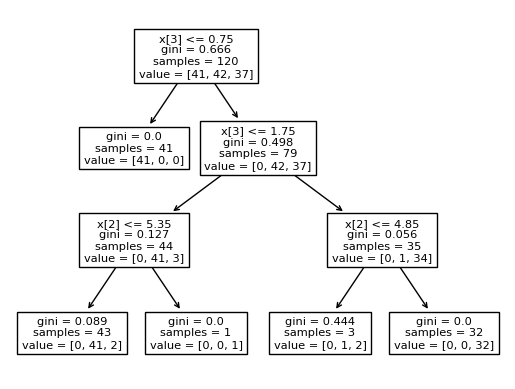

In [22]:
from sklearn.tree import plot_tree

plot_tree(clf)
plt.show()

In [51]:
# 평가 지표 : metrics
# 알고리즘의 성능평가
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred, average='binary'):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred, average=average)
    rec = recall_score(y_true, y_pred, average=average)
    
    print('accuracy : ', acc)
    print('precision : ', pre)
    print('recall : ', rec)

# KNN iris 다중분류 (Multiclass Classification)

In [55]:
def get_iris(mode=None):
    iris = pd.read_csv('iris.csv')
    df = iris.drop(['Id'], axis=1).copy()
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
   
    if(mode == 'bin'):
        df = df.loc[df['species'] != 'Iris-virginica']
       
    df['species']= df['species'].map({
        'Iris-setosa':0,
        'Iris-versicolor':1,
        'Iris-virginica':2
    })
    X = df.drop(['species'], axis=1)
    y= df['species']

    X, y = shuffle(X, y)
    num = int(len(y)*0.8)
   
    X_train = X.iloc[:num,:]    
    X_test = X.iloc[num:,:]      
    y_train = y.iloc[:num]        
    y_test  = y.iloc[num:]      
   
    for col in X_train.columns:
        mu = X_train[col].mean()
        std = X_train[col].std()
        X_train[col] = (X_train[col] - mu)/std
        X_test[col] = (X_test[col] - mu)/std

    return X_train, X_test, y_train, y_test

In [56]:
X_train, X_test, y_train, y_test = get_iris()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


C:\Users\014\AppData\Local\Temp\ipykernel_16916\562085556.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = (X_train[col] - mu)/std
C:\Users\014\AppData\Local\Temp\ipykernel_16916\562085556.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = (X_test[col] - mu)/std


In [57]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

### 학습

In [65]:
kn = KNeighborsClassifier(n_neighbors=5)

In [66]:
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
y_pred = kn.predict(X_test)

In [68]:
kn.score(X_train, y_train)

0.9666666666666667

In [69]:
score = []

# k를 3 ~ 30 넣어본다
for i in range(3, 30):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train, y_train)
    s = kn.score(X_train, y_train)
    score.append(s)

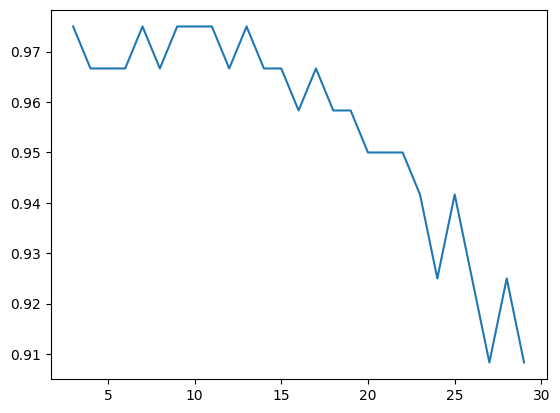

In [70]:
plt.plot(np.arange(3, 30),  score)

In [71]:
# binary 데이터가 아닌, 다중 분류를 하면,
# precision 과 recall 은 에러가 발생한다.
# 왜냐하면 default로 binary가 정해져있기 때문.
# 파라미터로 다중 분류를 하겠다고 전달해야한다.


print_score(y_test, y_pred, average='macro')

accuracy :  0.9
precision :  0.9141414141414143
recall :  0.9141414141414143


## Penguin 데이터 knn 모델(복습)

In [72]:
!gdown https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv
To: C:\workspace\flyai\penguins.csv

  0%|          | 0.00/2.77k [00:00<?, ?B/s]
13.8kB [00:00, 14.0MB/s]                   


In [102]:
pg = pd.read_csv('penguins.csv')
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [103]:
# null값 raw 제거
pg.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [104]:
pg = pg.dropna()
pg

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [105]:
pg['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [106]:
pg['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [107]:
pg['species'] = pg['species'].map({
    'Adelie' : 0,
    'Gentoo' : 1,
    'Chinstrap' : 2
})

pg['island'] = pg['island'].map({
    'Biscoe' : 0,
    'Dream' : 1,
    'Torgersen' : 2
})

pg['sex'] = pg['sex'].map({
    'MALE' : 0,
    'FEMALE' : 1
})

In [115]:
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,0
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,0


In [118]:
# X, y로 split

X = pg.iloc[:, 2:-1]
y_species = pg.iloc[:, 0]
y_island = pg.iloc[:, 1]
y_sex = pg.iloc[:, -1]

In [120]:
# 'species' 데이터 스플릿
X_train, X_test, y_species_train, y_species_test = train_test_split(X, y_species)

In [126]:
# 스케일링 함수

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)


In [128]:
y_species_train

223    1
197    2
18     0
203    2
49     0
      ..
87     0
221    1
106    0
278    1
330    1
Name: species, Length: 249, dtype: int64

In [135]:
kn = KNeighborsClassifier(n_neighbors=10)
kn.fit(X_train_s, y_species_train)

KNeighborsClassifier(n_neighbors=10)

In [136]:
kn.score(X_train, y_species_train)

C:\Users\014\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.3654618473895582